In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import os.path
import shutil
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import math

In [9]:
def printspec (filename, sample_x, sample_y):
    sample_rate, samples = wavfile.read(os.path.join(data_path, filename))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    
    plt.figure(figsize=(5,3)) 
    plt.figure(figsize=(max(times)*2,3))
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.ylim(top=15000) 
    plt.ylabel('Freq [Hz]', size=7)
    plt.xlabel('Time [ms]', size=7)
    plt.xticks(size=6)
    for a in sample_x:
        plt.axvline(x=a, linewidth=0.5, color='r')
    for b in sample_y:
        plt.axvline(x=b, linewidth=0.5, color='b')
    plt.show()

455
097-2019_November_16_2019_32744154_hpf.wav
11


<Figure size 500x300 with 0 Axes>

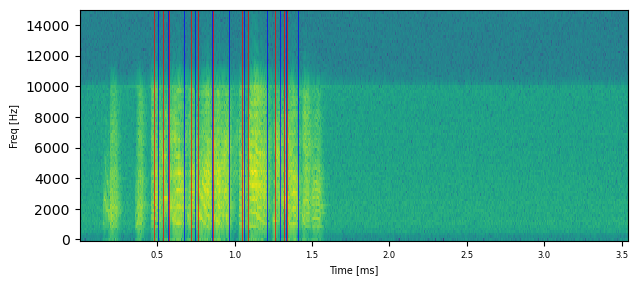

097-2019_November_16_2019_32572619_hpf.wav
18


<Figure size 500x300 with 0 Axes>

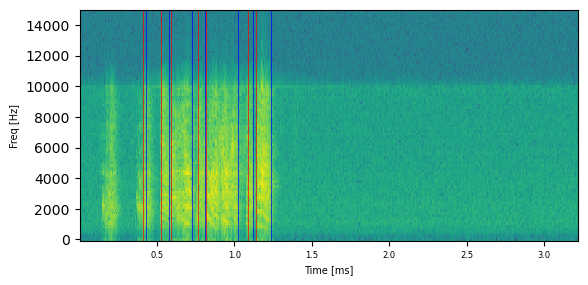

097-2019_November_16_2019_32762152_hpf.wav
43


<Figure size 500x300 with 0 Axes>

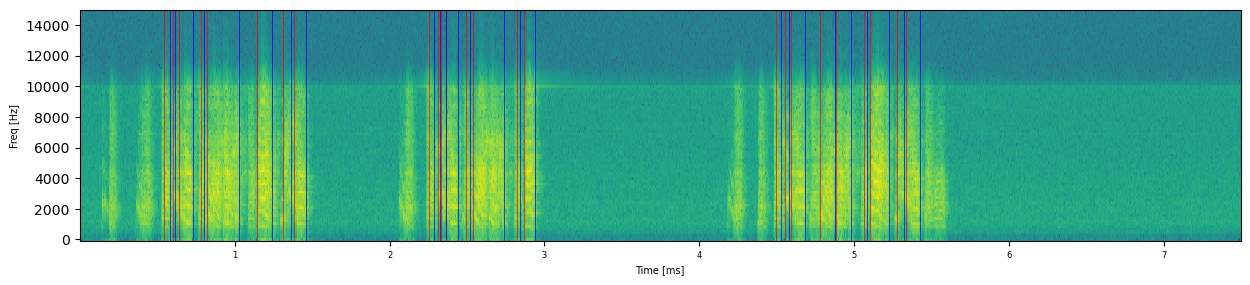

097-2019_November_16_2019_32637676_hpf.wav
52


<Figure size 500x300 with 0 Axes>

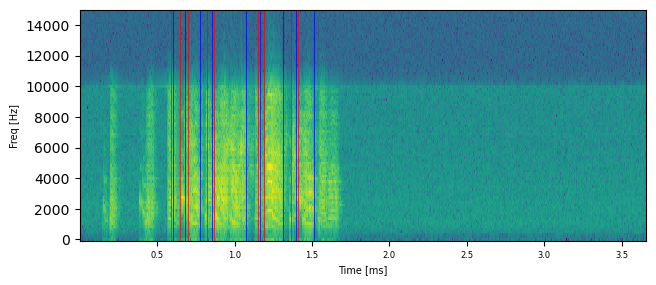

097-2019_November_16_2019_32862725_hpf.wav
58


<Figure size 500x300 with 0 Axes>

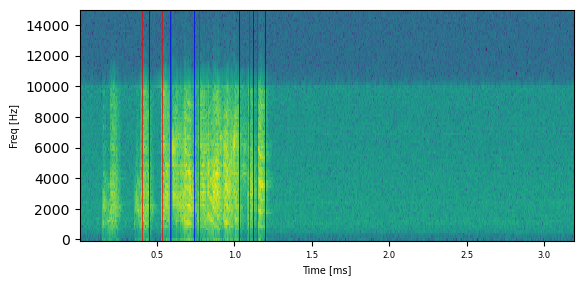

097-2019_November_16_2019_33282699_hpf.wav
64


<Figure size 500x300 with 0 Axes>

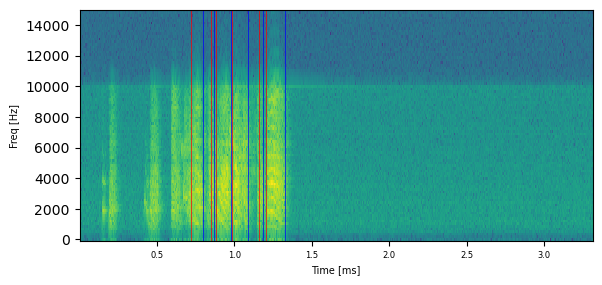

097-2019_November_16_2019_32577337_hpf.wav
80


<Figure size 500x300 with 0 Axes>

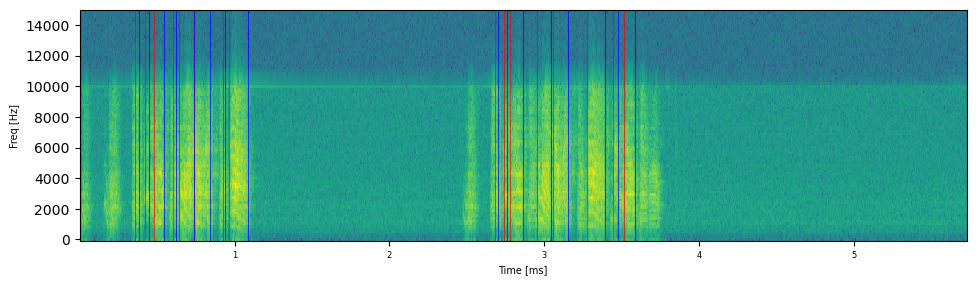

097-2019_November_16_2019_33216499_hpf.wav
121


<Figure size 500x300 with 0 Axes>

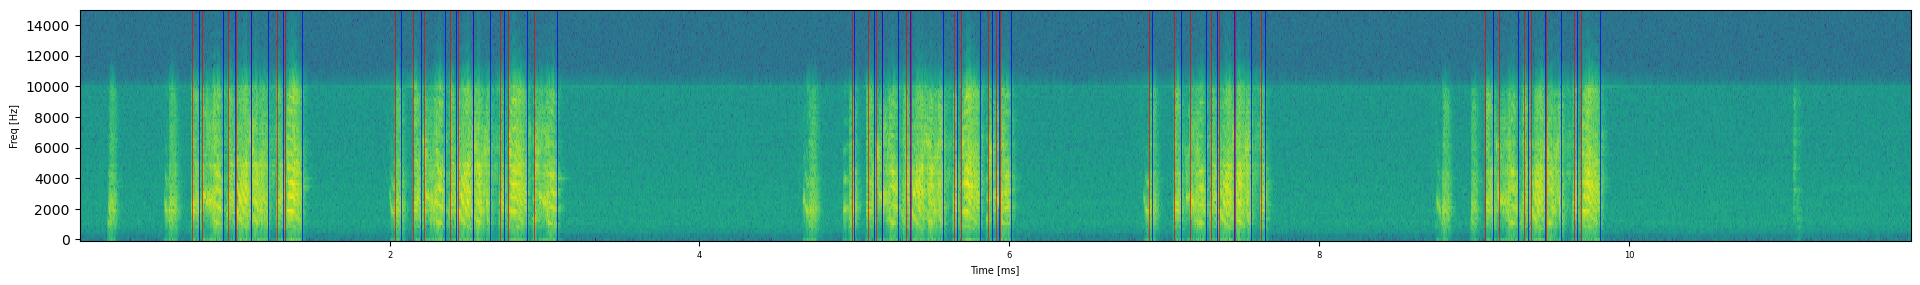

097-2019_November_16_2019_33287907_hpf.wav
133


<Figure size 500x300 with 0 Axes>

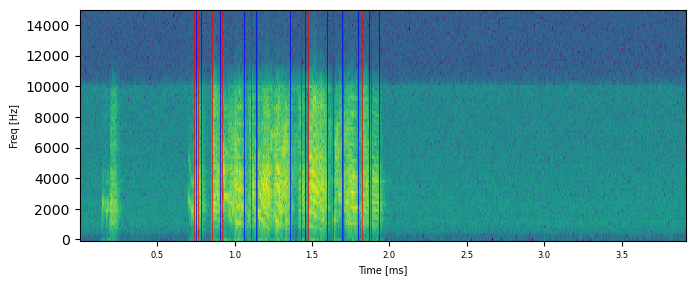

097-2019_November_16_2019_32665517_hpf.wav
155


<Figure size 500x300 with 0 Axes>

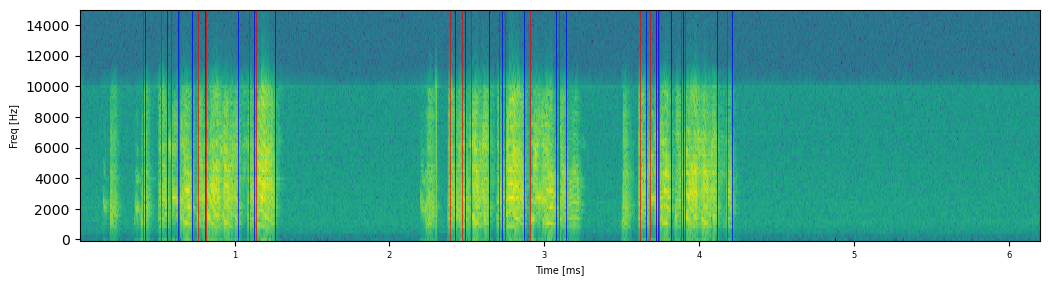

097-2019_November_16_2019_32632372_hpf.wav
170


<Figure size 500x300 with 0 Axes>

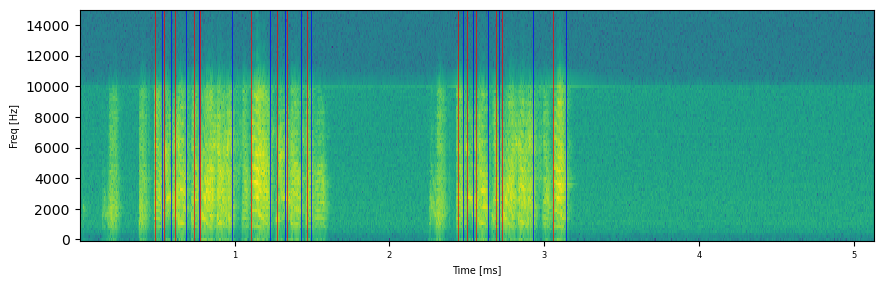

097-2019_November_16_2019_32757617_hpf.wav
179


<Figure size 500x300 with 0 Axes>

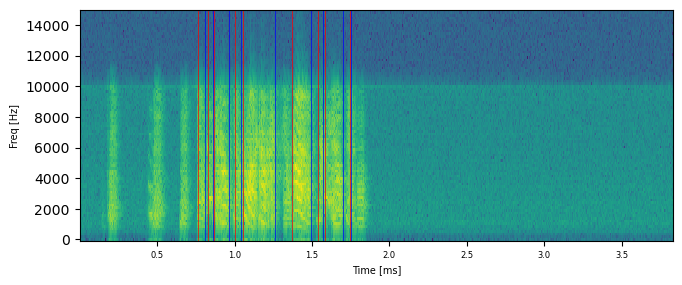

097-2019_November_16_2019_32781589_hpf.wav
193


<Figure size 500x300 with 0 Axes>

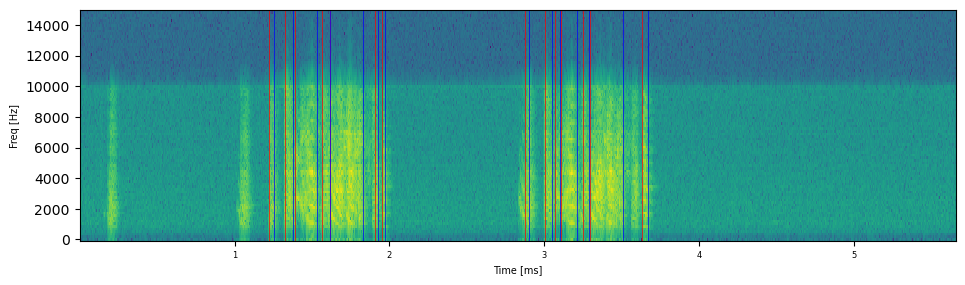

097-2019_November_16_2019_32567336_hpf.wav
208


<Figure size 500x300 with 0 Axes>

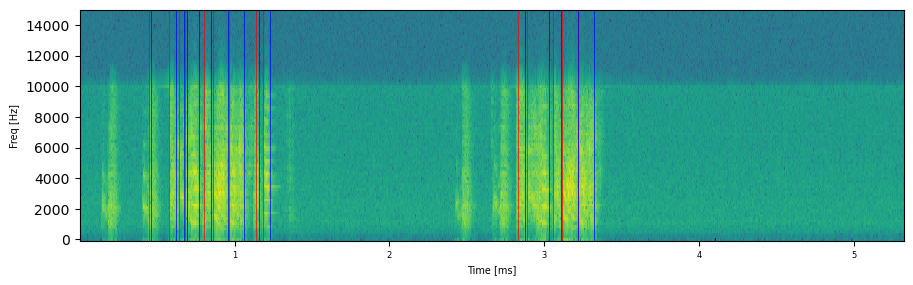

097-2019_November_16_2019_32602670_hpf.wav
228


<Figure size 500x300 with 0 Axes>

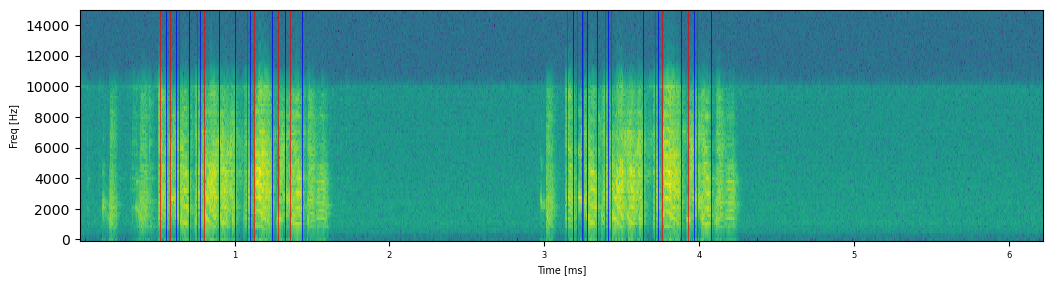

097-2019_November_16_2019_32810741_hpf.wav
299


<Figure size 500x300 with 0 Axes>

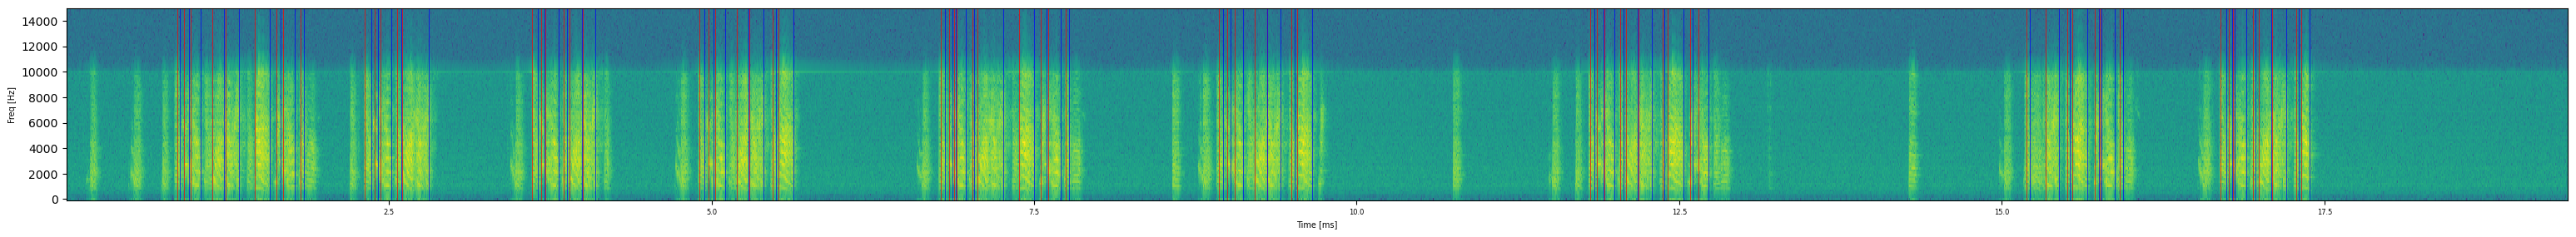

097-2019_November_16_2019_32563826_hpf.wav
305


<Figure size 500x300 with 0 Axes>

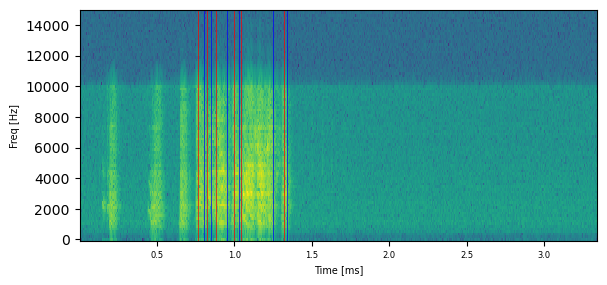

097-2019_November_16_2019_32705020_hpf.wav
326


<Figure size 500x300 with 0 Axes>

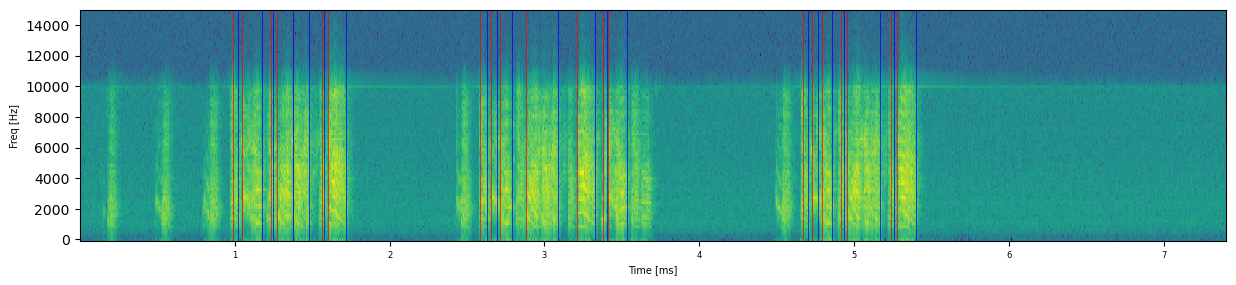

097-2019_November_16_2019_32641673_hpf.wav
333


<Figure size 500x300 with 0 Axes>

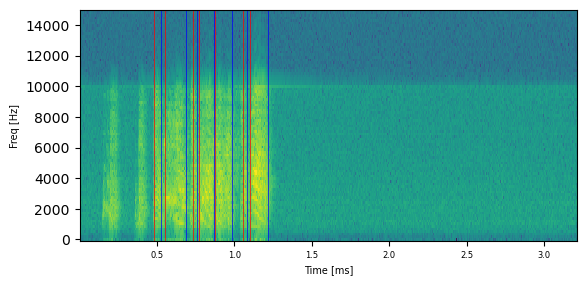

097-2019_November_16_2019_32770117_hpf.wav
343


<Figure size 500x300 with 0 Axes>

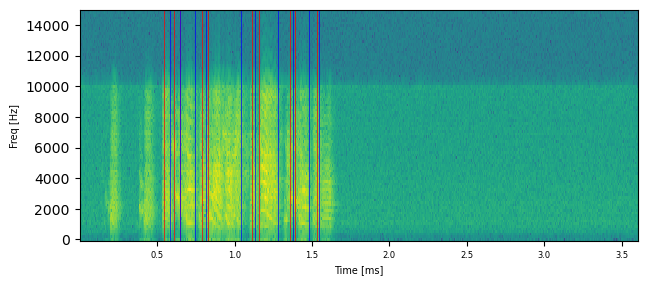

097-2019_November_16_2019_32714967_hpf.wav
360


<Figure size 500x300 with 0 Axes>

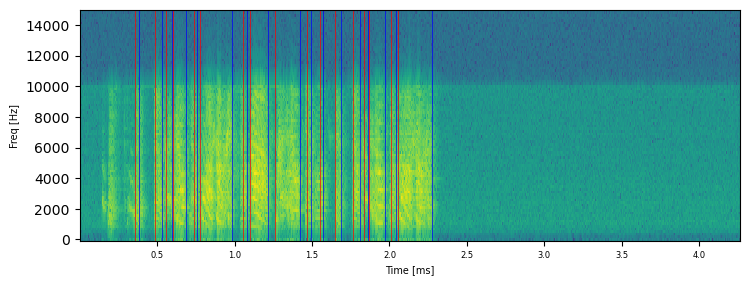

097-2019_November_16_2019_32656745_hpf.wav
384


<Figure size 500x300 with 0 Axes>

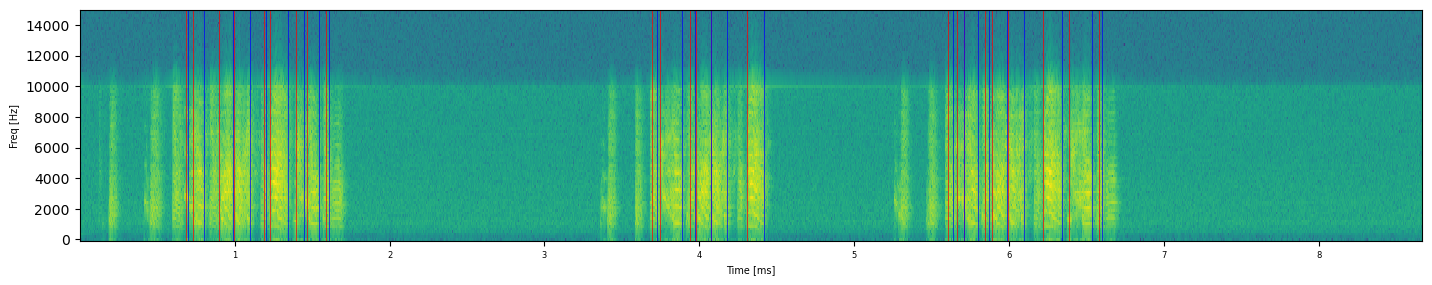

097-2019_November_16_2019_33211820_hpf.wav
390


<Figure size 500x300 with 0 Axes>

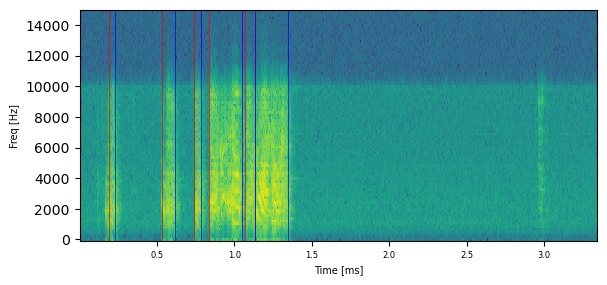

097-2019_November_16_2019_32617091_hpf.wav
404


<Figure size 500x300 with 0 Axes>

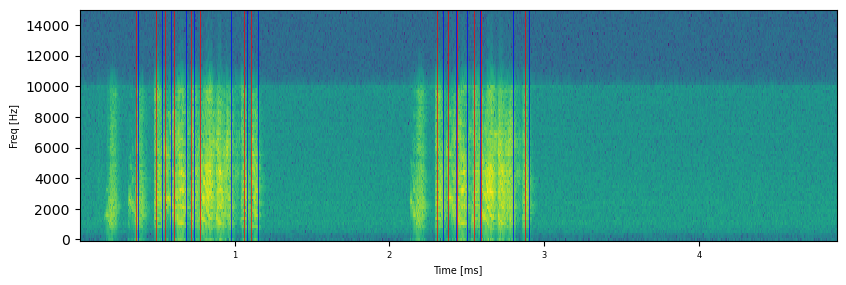

097-2019_November_16_2019_32695803_hpf.wav
415


<Figure size 500x300 with 0 Axes>

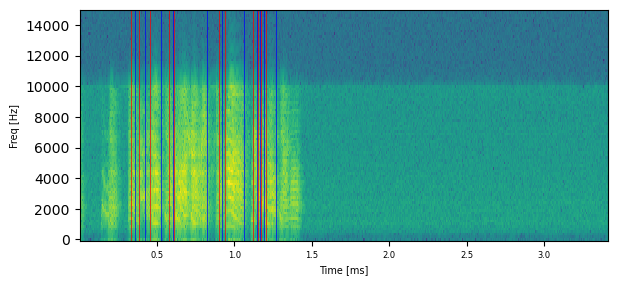

097-2019_November_16_2019_32733419_hpf.wav
455


<Figure size 500x300 with 0 Axes>

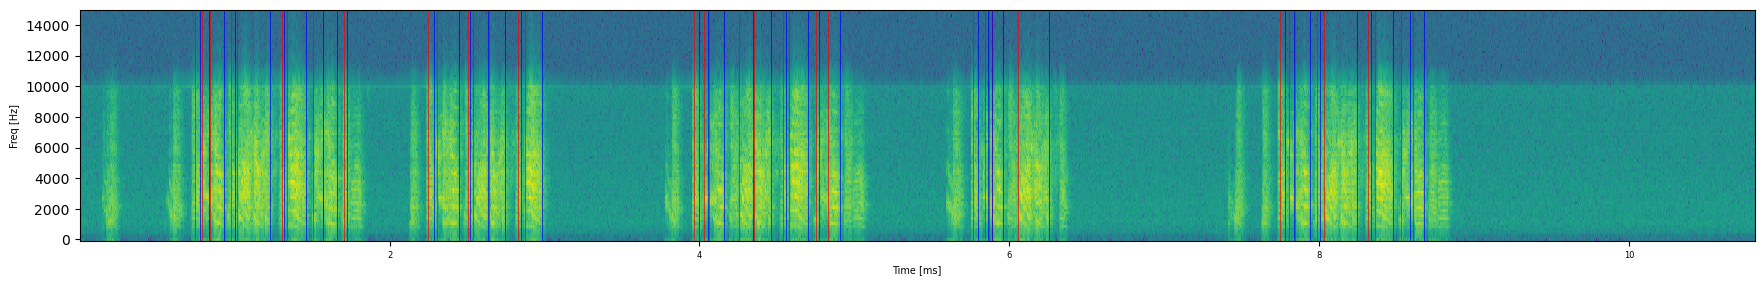

In [10]:
datafolder = r"/home/song/filtered"
data_path  = Path(datafolder)
data  = pd.read_csv(r"/home/TEST.csv", usecols=[0,1,2], header=None)
data  = data.dropna()
count = 0
sample_x = [0]
sample_y = [0]
data.reset_index(drop=True, inplace=True)
df_new = data.iloc[:,0]
print(len(df_new))
for filename in os.listdir(datafolder):
        if filename.endswith(".wav"):
            while df_new.iloc[count] == filename:
                x = math.floor(data.iloc[count, 1])/44100
                y = math.floor(data.iloc[count, 2])/44100
                sample_x = np.concatenate((np.array(sample_x), x), axis=None)
                sample_y = np.concatenate((np.array(sample_y), y), axis=None)
                count = count + 1
                if count == len(df_new):
                    break
            print(filename)
            print(count)
            sample_x = sample_x[1:]
            sample_y = sample_y[1:]
            printspec(filename, sample_x, sample_y)
            sample_x = [0]
            sample_y = [0]